In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import seaborn as sns


driver = webdriver.PhantomJS('phantomjs-2.1.1-linux-x86_64/bin/phantomjs')
driver.get("https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml")

# waiting for the page to load - TODO: change
wait = WebDriverWait(driver, 10)

try:
    wait.until(EC.visibility_of_element_located((By.ID, "content")))
except Exception:
    driver.save_screenshot('screenshot.png')





data = driver.page_source
driver.close()

soup = BeautifulSoup(data, "html.parser")

/home/ankit/anaconda3/lib/python3.7/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [2]:
tbl = soup.find('table')
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

driver = webdriver.PhantomJS('phantomjs-2.1.1-linux-x86_64/bin/phantomjs')
driver.get("https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml")

# waiting for the page to load - TODO: change
wait = WebDriverWait(driver, 10)

try:
    wait.until(EC.visibility_of_element_located((By.ID, "content")))
except Exception:
    driver.save_screenshot('screenshot.png')





data = driver.page_source
driver.close()

soup = BeautifulSoup(data, "html.parser")
rows = tbl.findAll('tr')

In [48]:
data_full = []
for row in rows:
    #print (row,'\n')
    data_row = []
    cols = row.find_all('td')
    for col in cols:
        #print (col,'\n')
        try:
            data_row.append(col.contents[0])
        except:
            data_row.append(np.nan)
    data_full.append(data_row)

In [49]:
df = pd.DataFrame(data_full)
df = df.loc[~(df.isnull().sum(axis=1)>=24)]

col = [i for i in df.columns if pd.notnull(i)]
df = df[col]

In [50]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
col = [i for i in df.columns if pd.notnull(i)]
df = df[col]

In [51]:
df['Date Announced'].unique()

array(['30/01/2020', '02/02/2020', '03/02/2020', '02/03/2020',
       '03/03/2020', '04/03/2020', '05/03/2020', '06/03/2020',
       '07/03/2020', '08/03/2020', '09/03/2020', '10/03/2020',
       '11/03/2020', '12/03/2020', '13/03/2020', '14/03/2020',
       '15/03/2020', '16/03/2020', '17/03/2020', '18/03/2020',
       '19/03/2020', '20/03/2020', '21/03/2020', '22/03/2020',
       '23/03/2020', '24/03/2020', '25/03/2020', '26/03/2020',
       '27/03/2020', '28/03/2020', '29/03/2020', '30/03/2020',
       '31/03/2020', '01/04/2020'], dtype=object)

In [52]:
pd.to_datetime(df['Date Announced'],format='%d/%m/%Y').min(), pd.to_datetime(df['Date Announced'],format='%d/%m/%Y').max()

(Timestamp('2020-01-30 00:00:00'), Timestamp('2020-04-01 00:00:00'))

In [53]:
df['Date Announced'] = pd.to_datetime(df['Date Announced'],format='%d/%m/%Y')

In [54]:
from datetime import datetime  
from datetime import timedelta   
unique_state = df['Detected State'].unique()
min_date = df['Date Announced'].min()
max_date = df['Date Announced'].max()

In [55]:
min_date,max_date

(Timestamp('2020-01-30 00:00:00'), Timestamp('2020-04-01 00:00:00'))

In [56]:
total_date = []
total_date.append(min_date)
while True:
    min_date = min_date + timedelta(days=1) 
    total_date.append(min_date)
    if min_date >= max_date:
        break

2020-01-31 00:00:00
2020-02-01 00:00:00
2020-02-02 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00
2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-08 00:00:00
2020-02-09 00:00:00
2020-02-10 00:00:00
2020-02-11 00:00:00
2020-02-12 00:00:00
2020-02-13 00:00:00
2020-02-14 00:00:00
2020-02-15 00:00:00
2020-02-16 00:00:00
2020-02-17 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00
2020-02-20 00:00:00
2020-02-21 00:00:00
2020-02-22 00:00:00
2020-02-23 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00
2020-02-26 00:00:00
2020-02-27 00:00:00
2020-02-28 00:00:00
2020-02-29 00:00:00
2020-03-01 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-07 00:00:00
2020-03-08 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00
2020-03-14 00:00:00
2020-03-15 00:00:00
2020-03-16 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-20 00:00:00


In [57]:
state = []
date = []
for s in unique_state:
    for d in total_date:
        state.append(s)
        date.append(d)

In [58]:
df1 = pd.DataFrame({'state':state,'date':date})
#df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.dayofyear
df['day'] = df['Date Announced'].dt.dayofyear

In [59]:
df1.columns

Index(['state', 'date', 'day'], dtype='object')

In [60]:
df_state_day_count = df.groupby(['Detected State','day'])['Patient Number'].agg('count').reset_index()
df_state_day_count.columns = ['state', 'day', 'patient_count']

In [113]:
unique_state = df_state_day_count.groupby('state')['patient_count'].sum().reset_index().sort_values('patient_count',ascending=False)['state'].unique()

In [66]:
df1 = df1.merge(df_state_day_count,on=['state','day'],how='left')

In [68]:
df1.replace(np.nan,0,inplace=True)

In [115]:

def weekly_trend(**kwargs):
    """
    Mean transaction amount on a weekly basis for a given feature
    """
    feature = kwargs.get('feature', None)
    f = df2.groupby([*feature, pd.Grouper(key='date',freq='D')])['patient_count'].sum().reset_index()
    f['date'] = f['date'].dt.date
    f.columns = [*feature,'date','sum']
    hue = feature[0]
    val = None if len(feature) == 1 else feature[1] 
    aspect = 1 if val is not None else 2
    height = 10 if val is not None else 7
    g = sns.catplot(x="date", 
            y = 'sum',
            hue = hue,
            col = val,
            data=f, 
            kind='point', 
            height = height,
            aspect = aspect,
            palette=sns.color_palette("bright", 10)
            )
    g.set_xticklabels(rotation=90)

/home/ankit/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


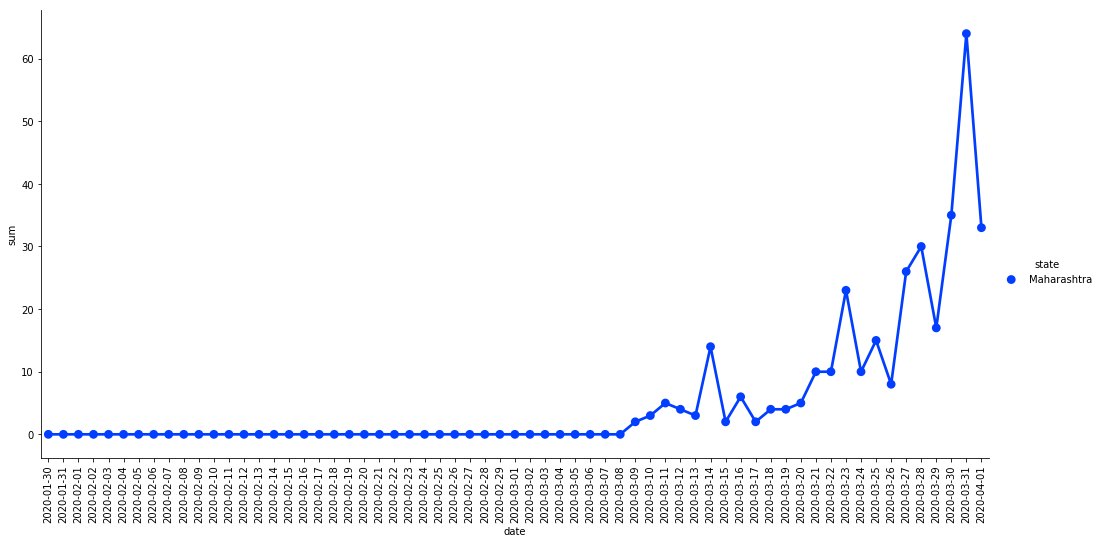

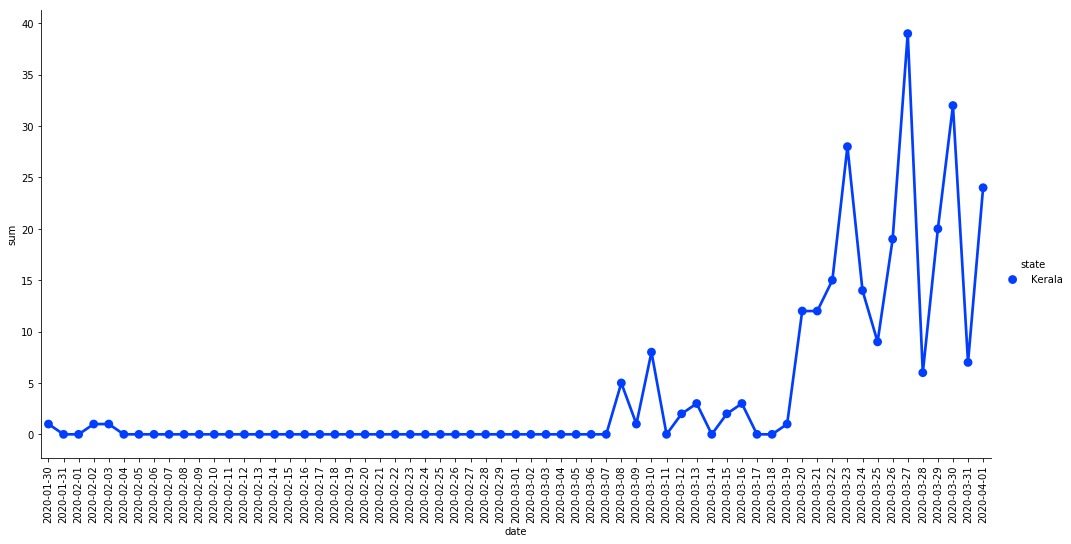

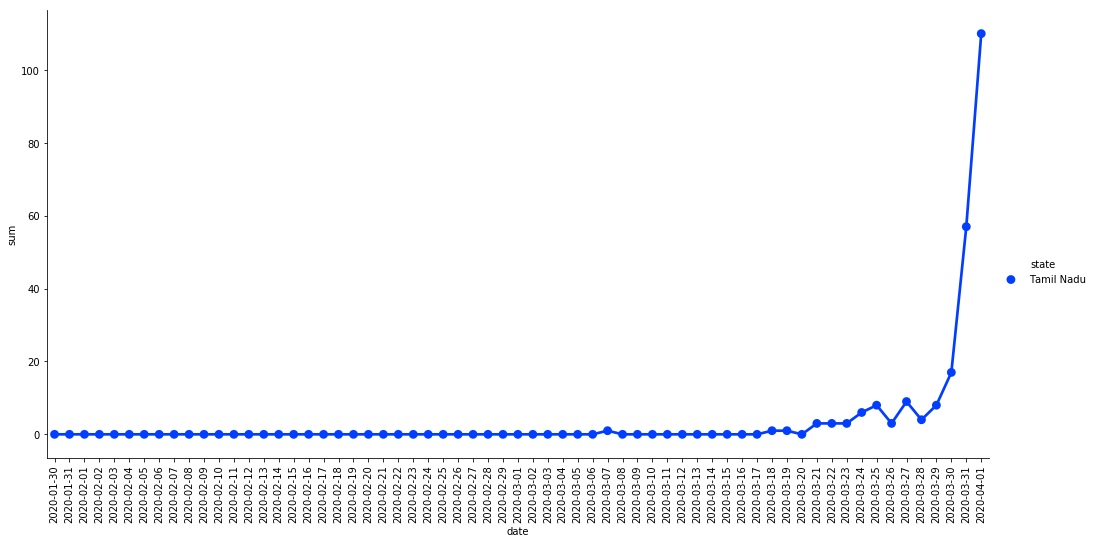

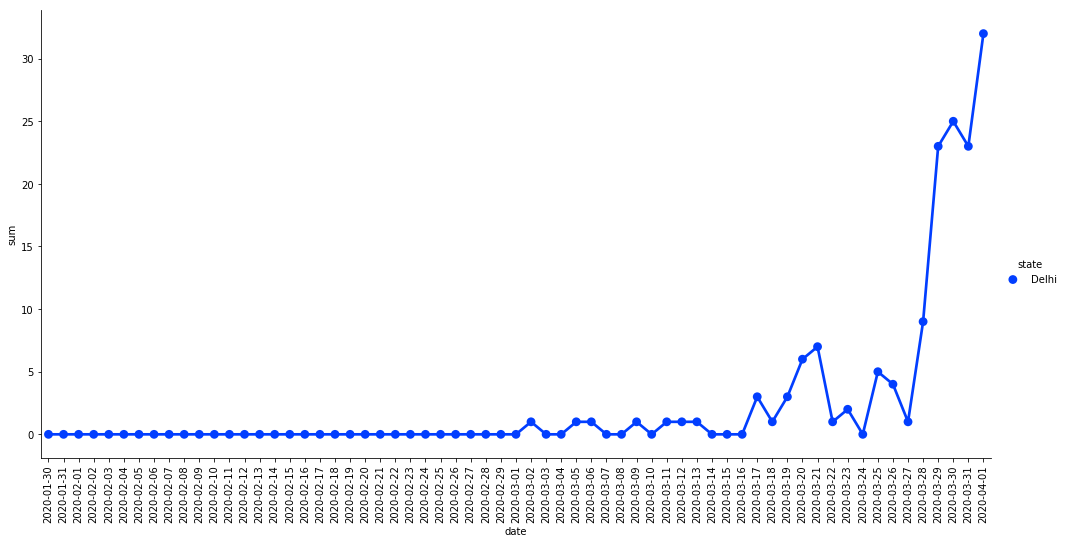

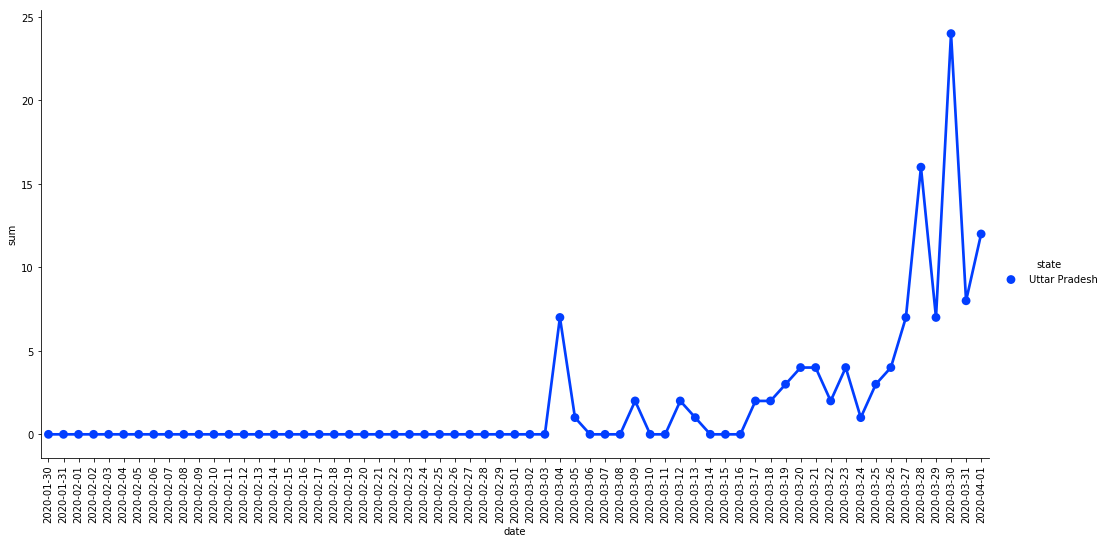

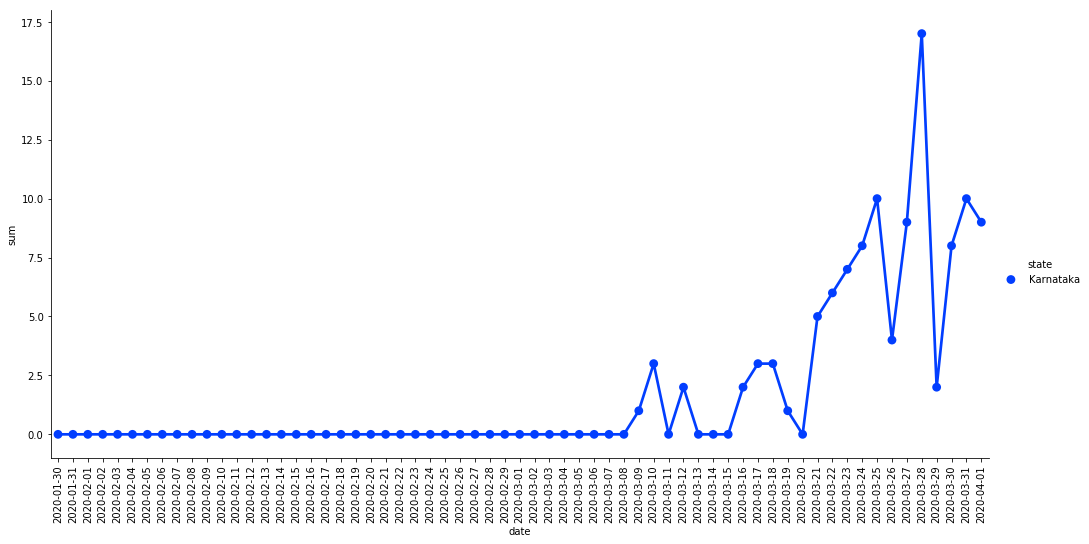

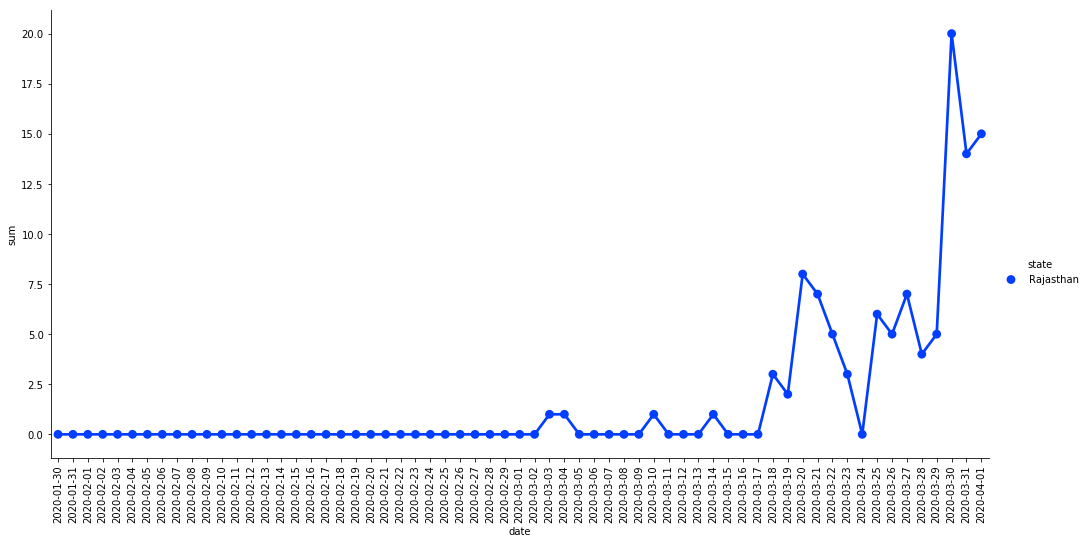

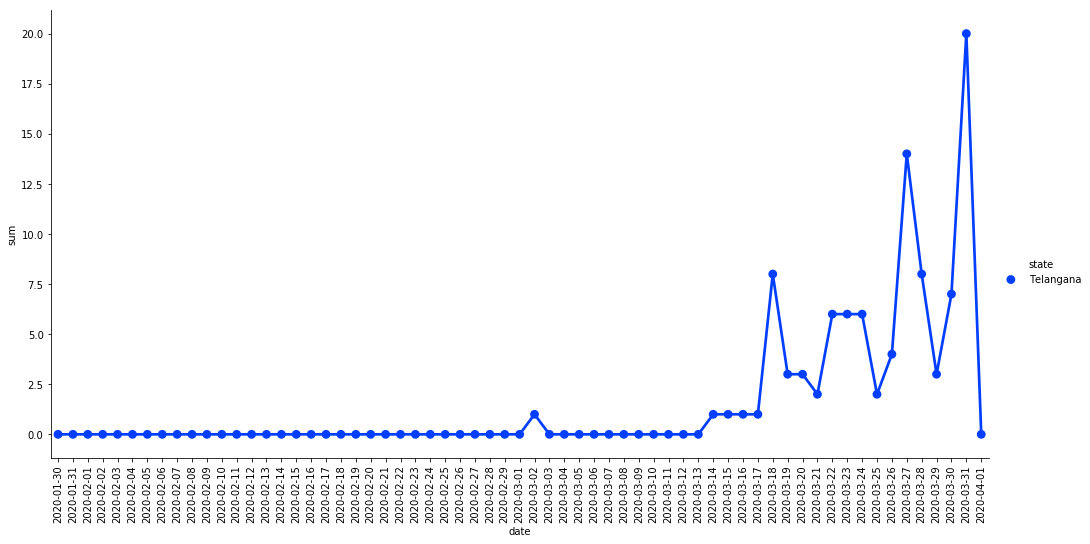

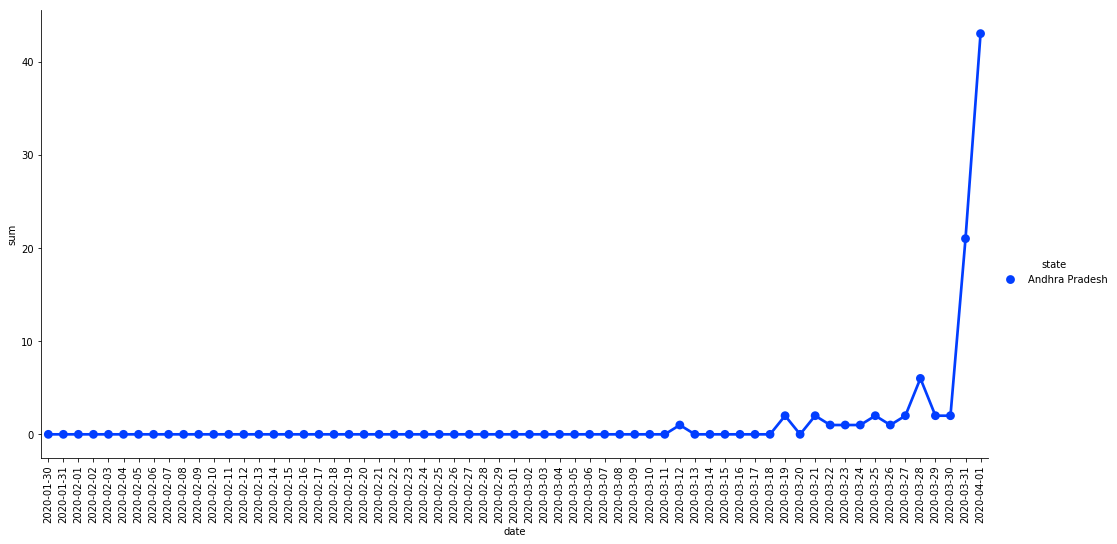

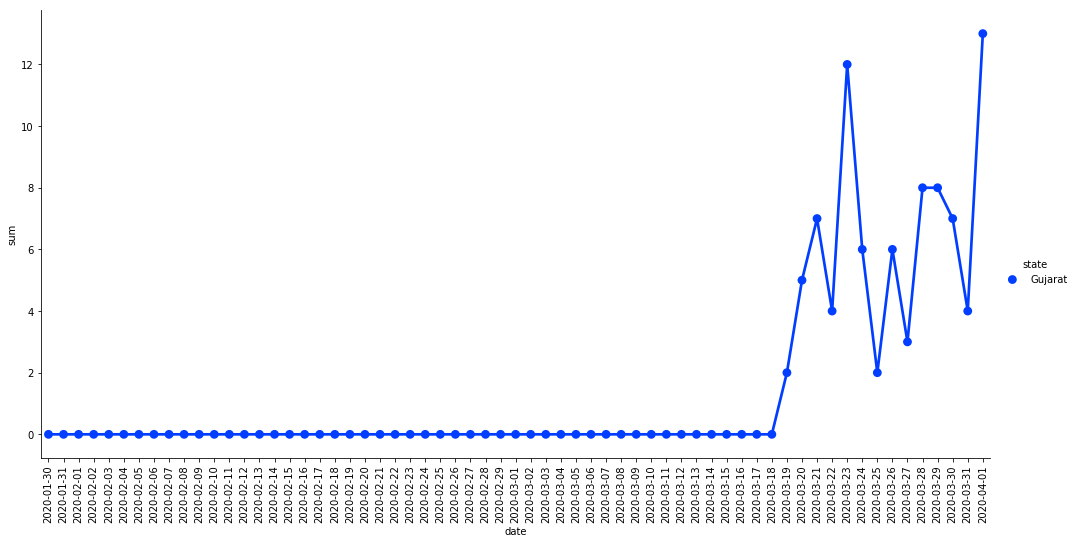

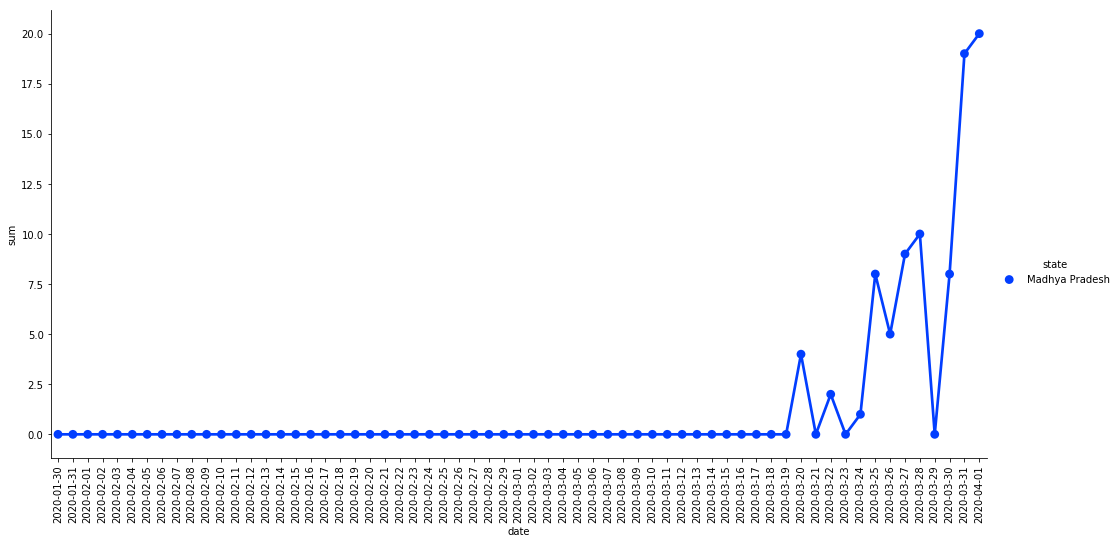

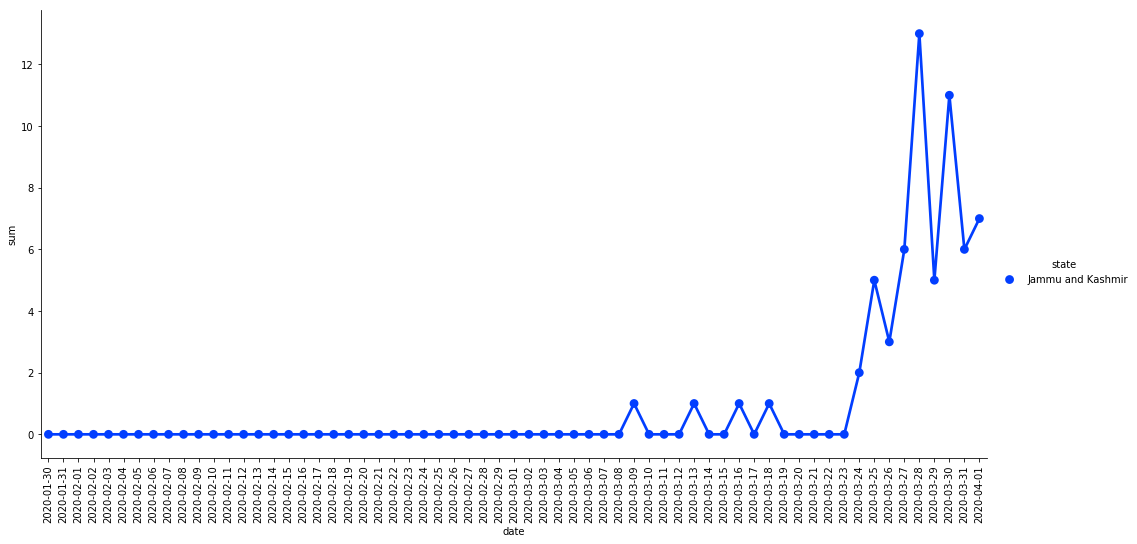

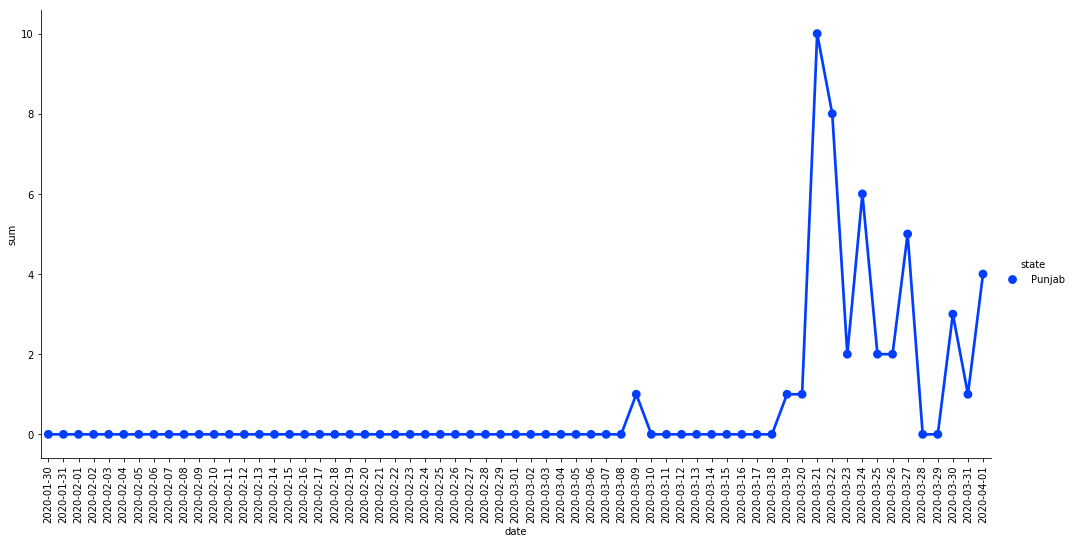

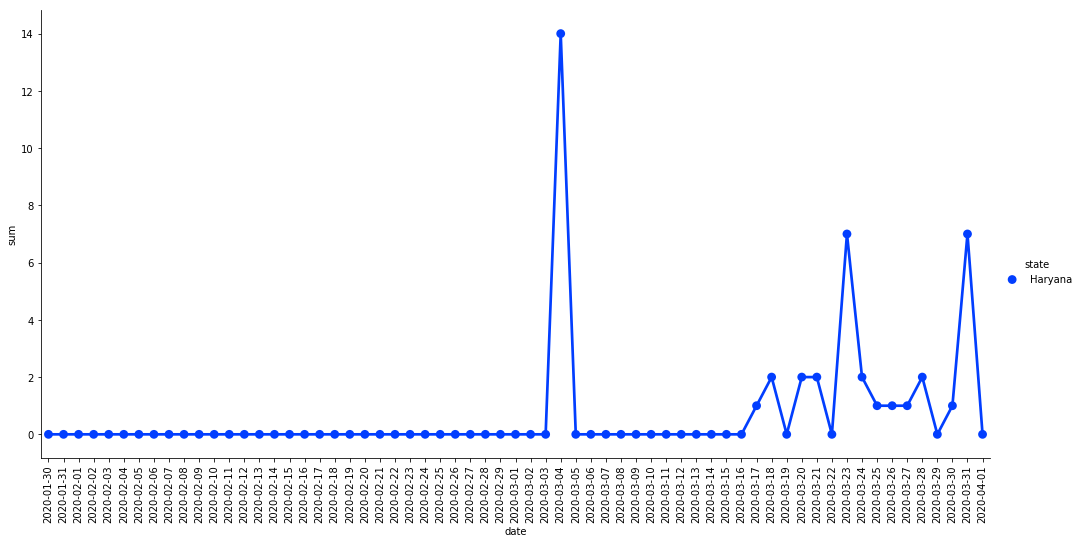

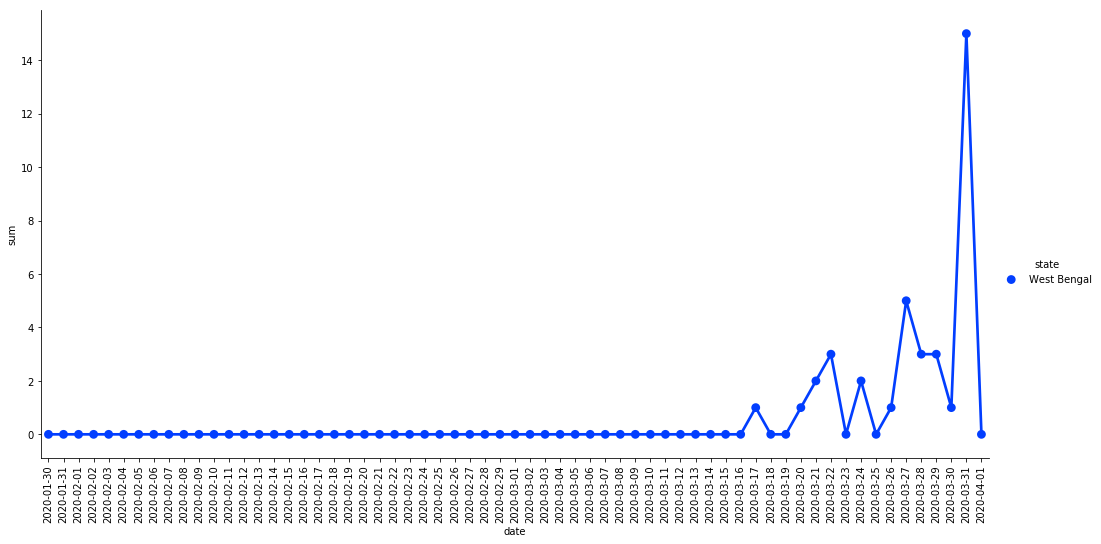

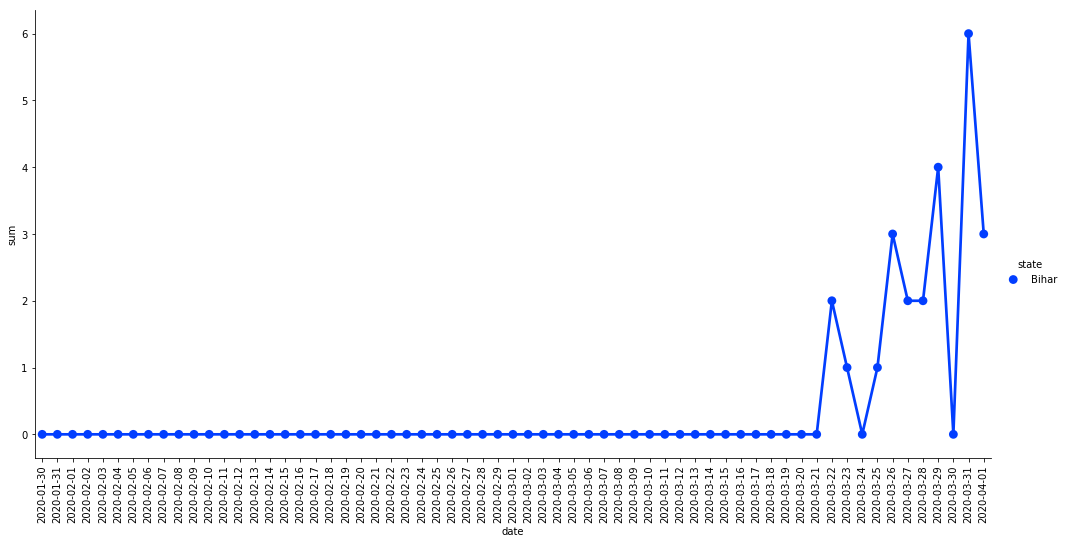

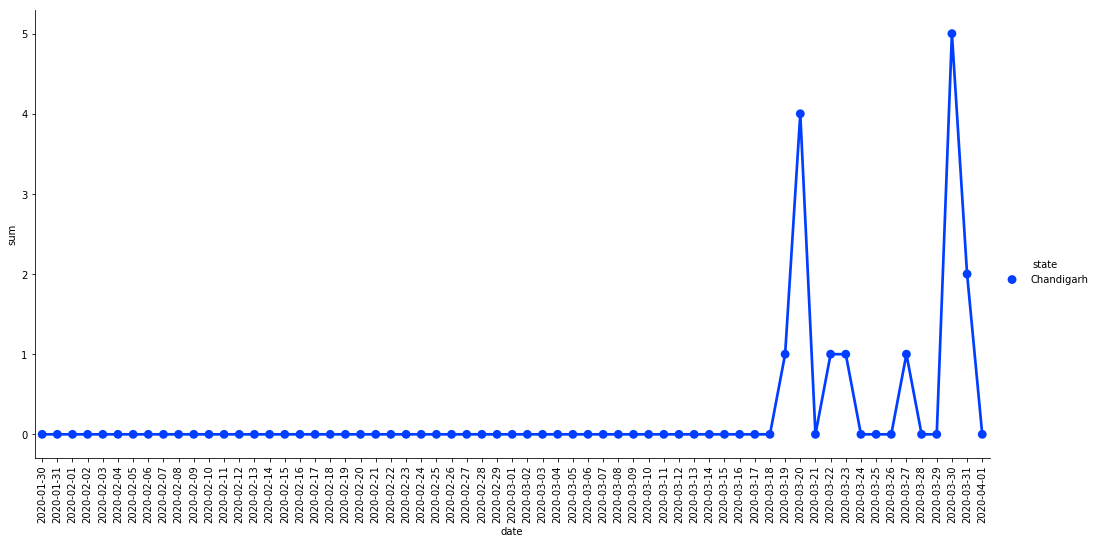

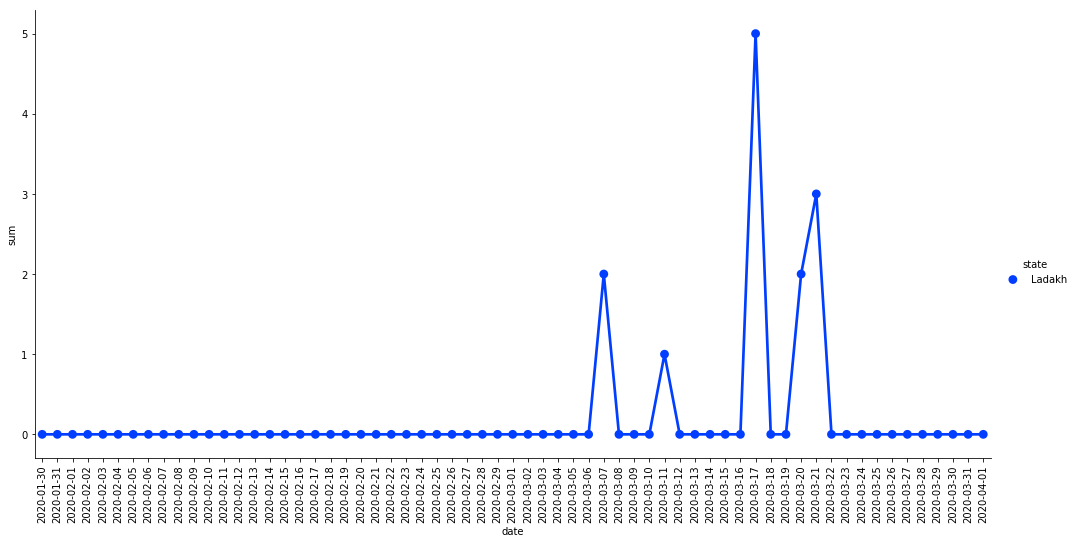

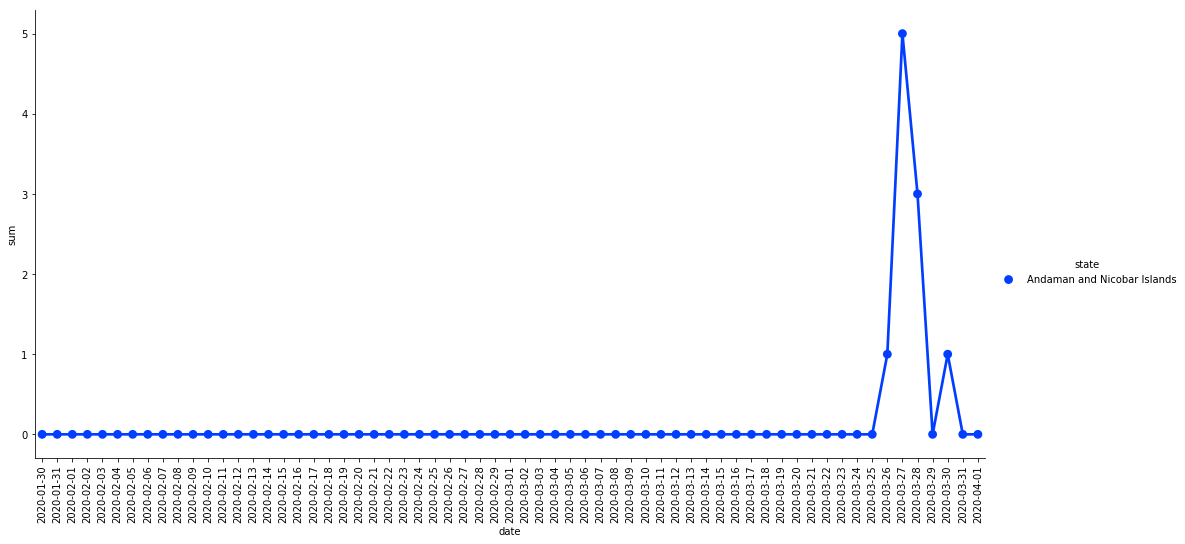

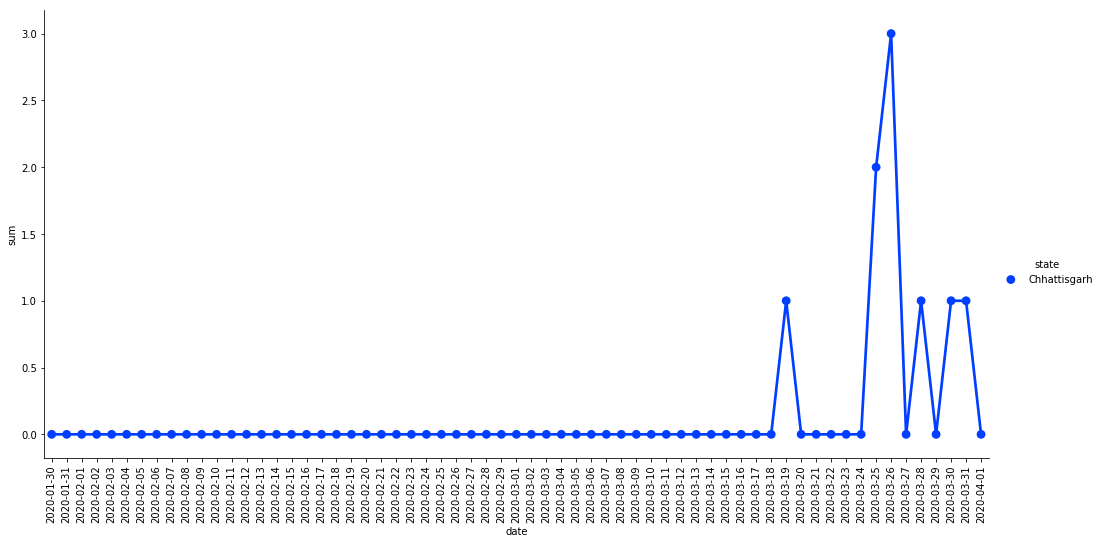

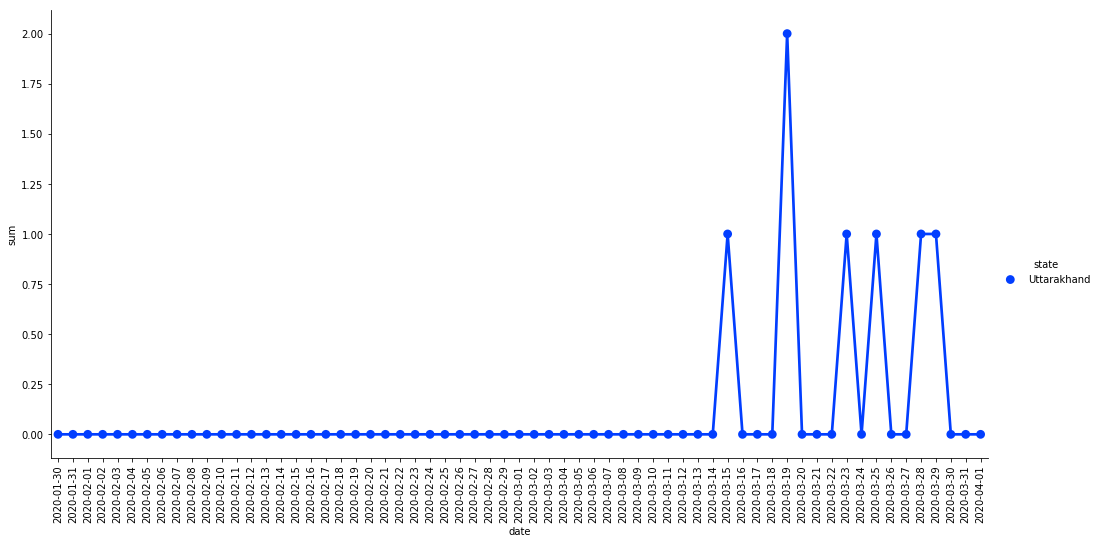

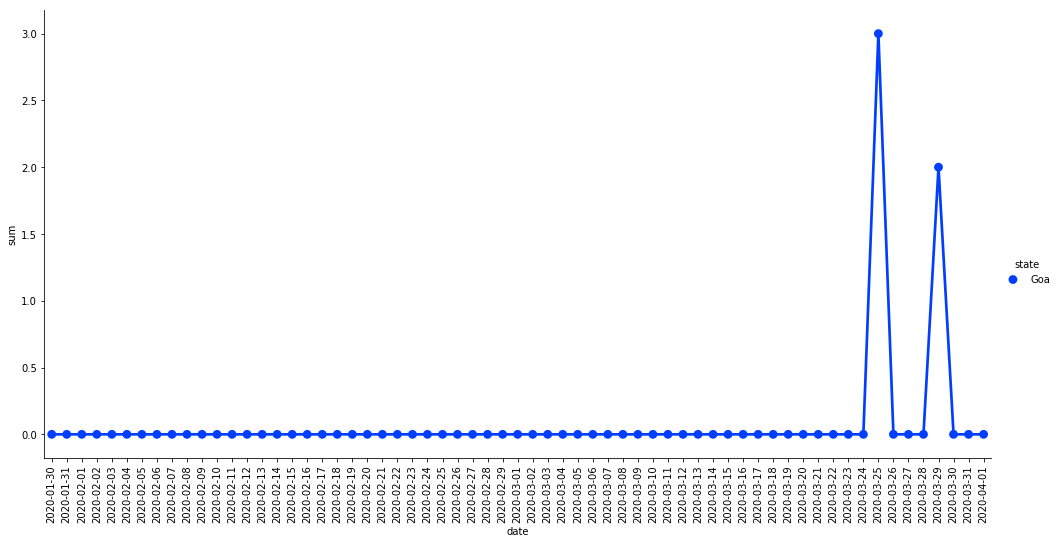

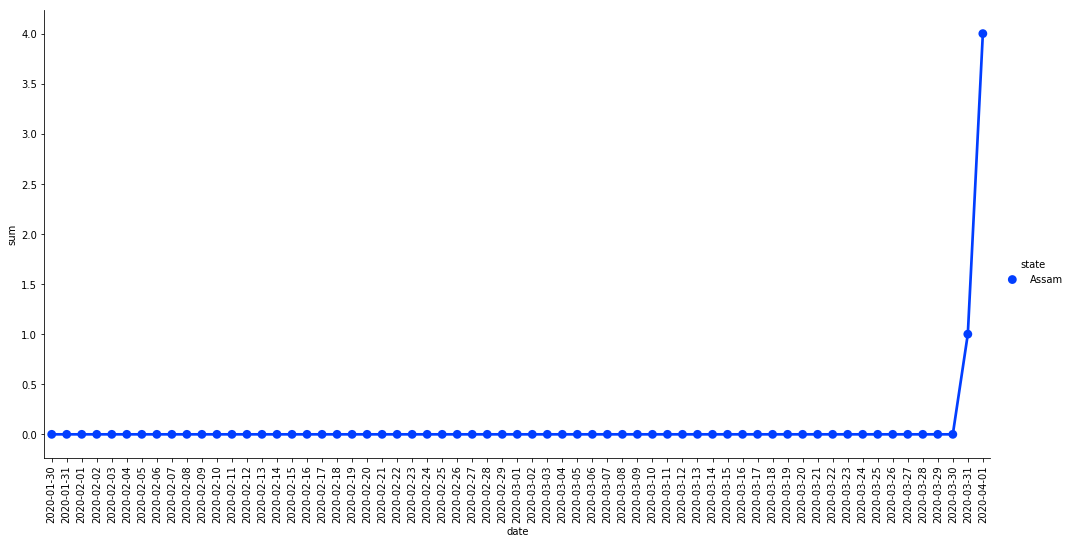

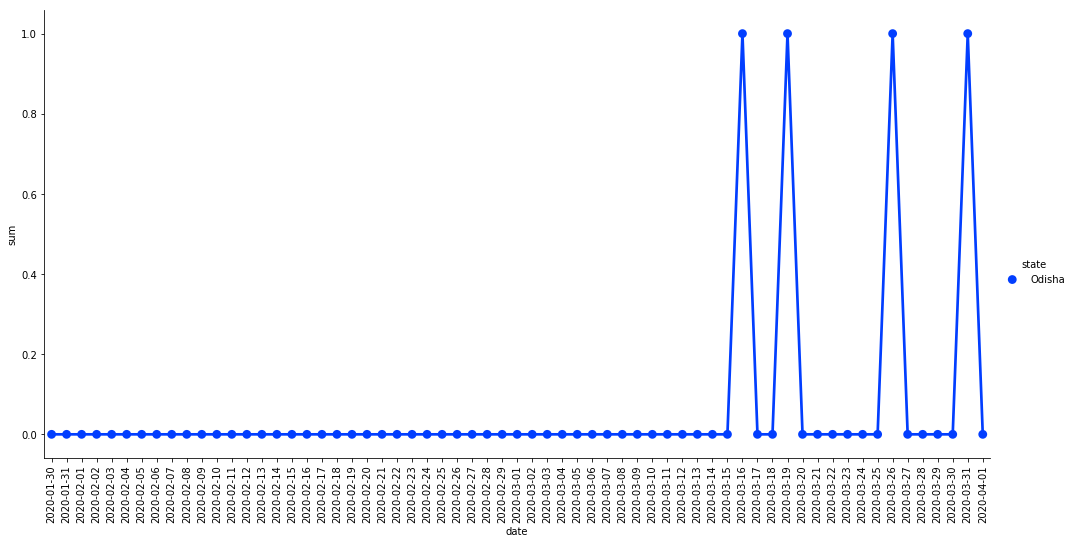

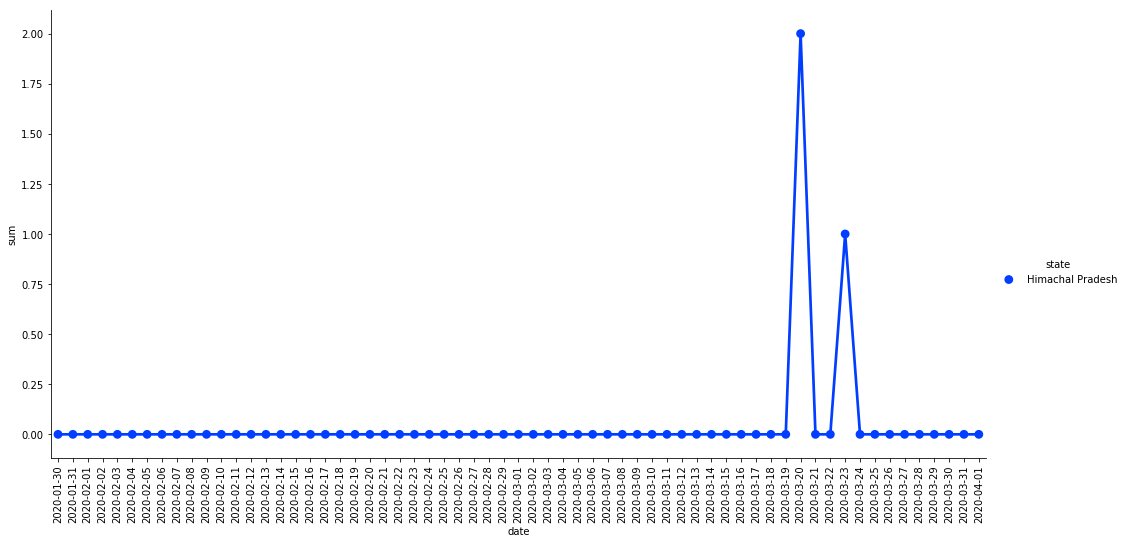

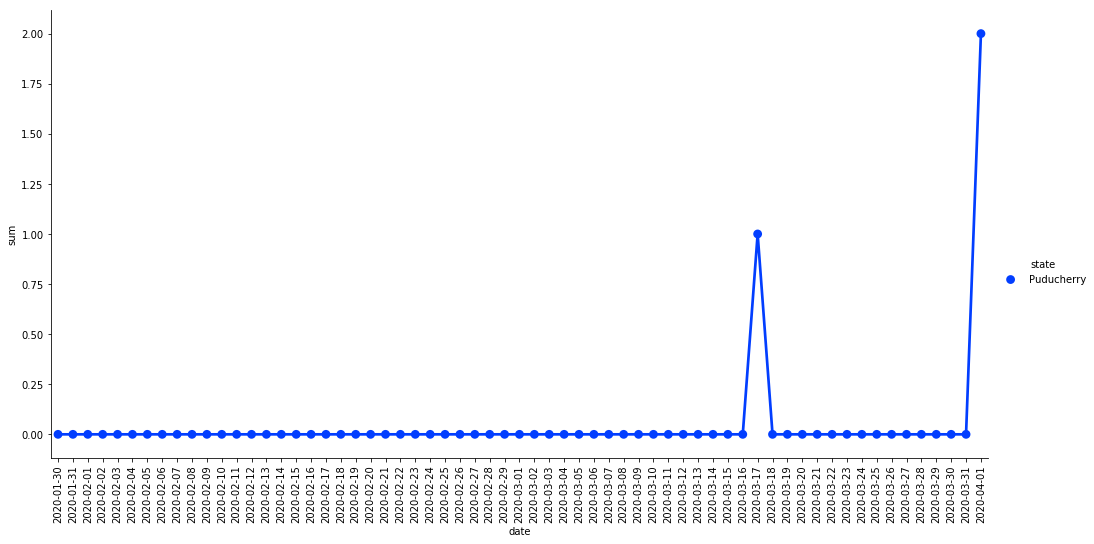

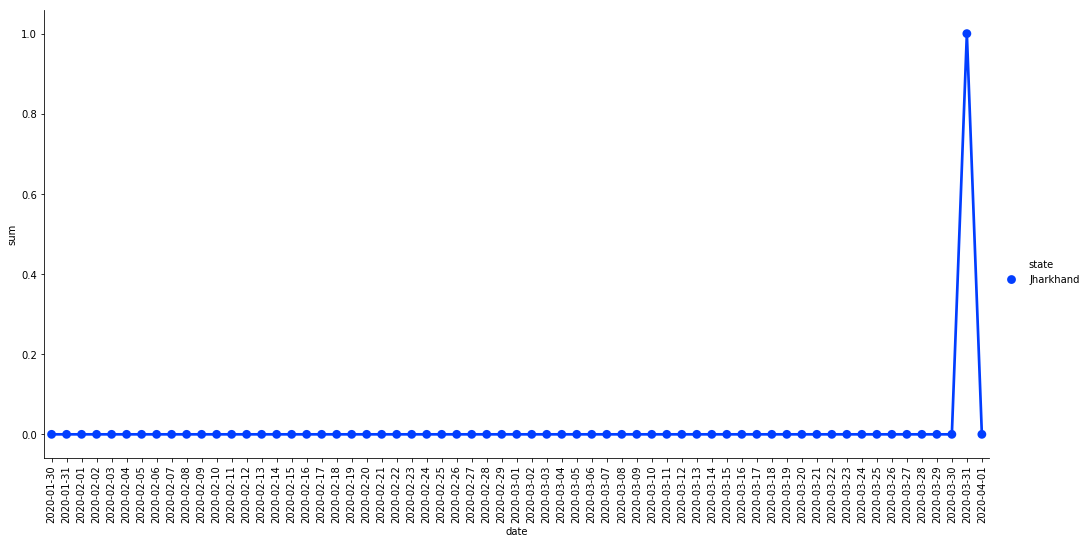

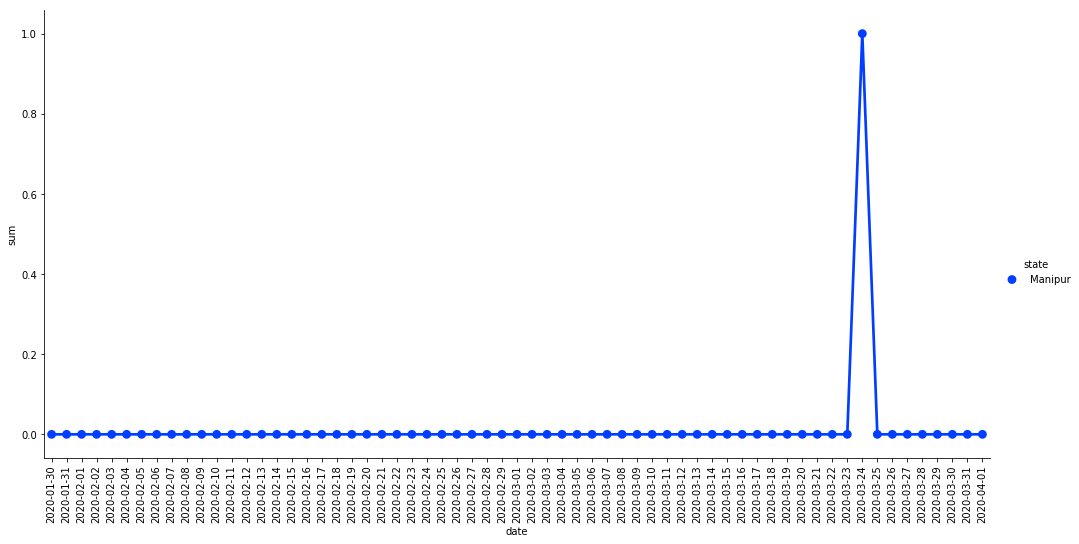

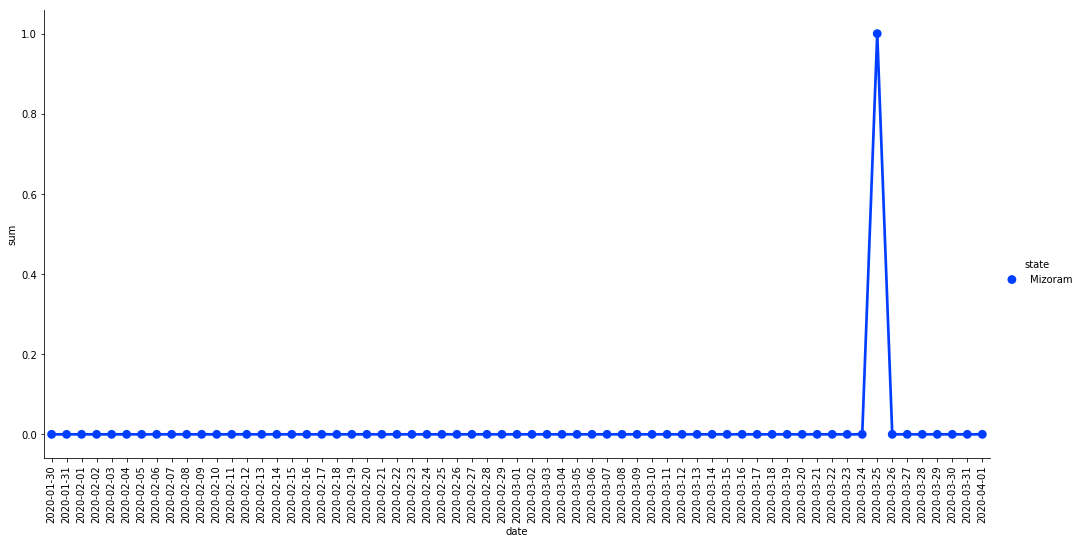

In [116]:
for s in unique_state:
    df2 = df1.loc[df1.state==s]
    #print (s)
    weekly_trend(feature=['state'])